# Amazon best selling titles: EDA project

Data source: https://www.kaggle.com/sootersaalu/amazon-top-50-bestselling-books-2009-2019

## Objective

This EDA project is to explore the the dataset of top 50 best selling books on Amazon between 2009 and 2019.

The data is analyzed in the following steps:
1. Pleliminary data processing
2. Yearly analysis
3. Non-fiction vs fiction books
4. Top authors


In [4]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [6]:
df = pd.read_csv("bestsellers with categories.csv")

### Preliminary data processing

In [3]:
df.head(5)

,Name,Author,User Rating,Reviews,Price,Year,Genre
0,10-Day Green Smoothie Cleanse,JJ Smith,4.7,17350,8,2016,Non Fiction
1,11/22/63: A Novel,Stephen King,4.6,2052,22,2011,Fiction
2,12 Rules for Life: An Antidote to Chaos,Jordan B. Peterson,4.7,18979,15,2018,Non Fiction
3,1984 (Signet Classics),George Orwell,4.7,21424,6,2017,Fiction
4,"5,000 Awesome Facts (About Everything!) (Natio...",National Geographic Kids,4.8,7665,12,2019,Non Fiction


From here, you can see that the dataset has 7 variables:
1. Numerical: User Rating, Reviews, Price, Year
2. Categorical: Genre
3. Non-numerical: Author, Name

Now let's look at the shape of the dataset

In [34]:
len(df) 

550

Number of entries: 550

Information of the dataset's numerical variables:

In [45]:
df.describe()

,User Rating,Reviews,Price,Year
count,550.000000,550.000000,550.000000,550.000000
mean,4.618364,11953.281818,13.100000,2014.000000
std,0.226980,11731.132017,10.842262,3.165156
min,3.300000,37.000000,0.000000,2009.000000
25%,4.500000,4058.000000,7.000000,2011.000000
50%,4.700000,8580.000000,11.000000,2014.000000
75%,4.800000,17253.250000,16.000000,2017.000000
max,4.900000,87841.000000,105.000000,2019.000000


Information of dataset's categorical variables:

In [4]:
df.describe(include = object) #explore values of object data

,Name,Author,Genre
count,550,550,550
unique,351,248,2
top,Publication Manual of the American Psychologic...,Jeff Kinney,Non Fiction
freq,10,12,310


Check missing values and data duplicates:

In [18]:
df.isnull().sum()

Name           0
Author         0
User Rating    0
Reviews        0
Price          0
Year           0
Genre          0
dtype: int64

In [20]:
df.drop_duplicates(inplace=True)
len(df)

550

The data is already clean: no duplicates and missing entries. 

### Yearly analysis 

#### 1. By reviews

How the number of votings per year looks like?

In [47]:
df.groupby("Year").Reviews.sum()

Year
2009    235506
2010    273981
2011    405041
2012    654546
2013    654907
2014    792997
2015    711669
2016    709800
2017    644420
2018    696521
2019    794917
Name: Reviews, dtype: int64

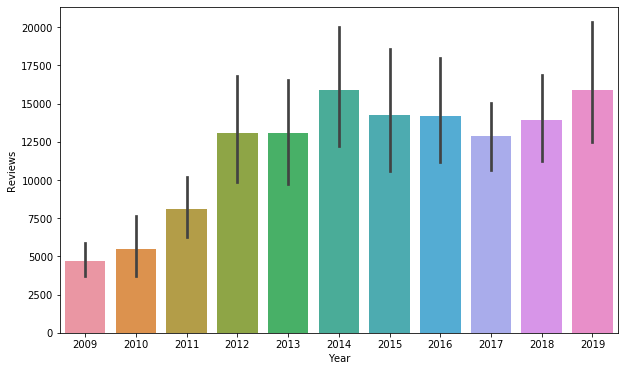

In [49]:
plt.figure(figsize = (10,6))
sns.barplot(data = df, x = "Year", y = "Reviews")
plt.show()

Most reviewed book between 2009-2019

In [31]:
df[df["Reviews"] == df["Reviews"].max()]

,Name,Author,User Rating,Reviews,Price,Year,Genre
534,Where the Crawdads Sing,Delia Owens,4.8,87841,15,2019,Fiction


Most reviewed book per year:

In [33]:
n = df.groupby("Year")["Reviews"].idxmax()
df.loc[n]

,Name,Author,User Rating,Reviews,Price,Year,Genre
459,The Shack: Where Tragedy Confronts Eternity,William P. Young,4.6,19720,8,2009,Fiction
407,The Hunger Games,Suzanne Collins,4.7,32122,14,2010,Fiction
408,The Hunger Games (Book 1),Suzanne Collins,4.7,32122,8,2011,Fiction
135,Gone Girl,Gillian Flynn,4.0,57271,10,2012,Fiction
136,Gone Girl,Gillian Flynn,4.0,57271,10,2013,Fiction
137,Gone Girl,Gillian Flynn,4.0,57271,9,2014,Fiction
382,The Girl on the Train,Paula Hawkins,4.1,79446,18,2015,Fiction
383,The Girl on the Train,Paula Hawkins,4.1,79446,7,2016,Fiction
399,The Handmaid's Tale,Margaret Atwood,4.3,29442,7,2017,Fiction
32,Becoming,Michelle Obama,4.8,61133,11,2018,Non Fiction


An observation here is: most top reviewed books per year are fiction books, most of which belong to the category: thriller, sci-fi and mystery. I guess it's because these categories would evoke lots of discussion, thus lead to large fanbase.

Most of those titles have become top movies/TV series produced around that year of publication.

The only exception is the list is Michelle Obama's biography "Becoming".

#### 2. By price

Top 5 most expensive books are:

In [29]:
df.sort_values(by = ["Price"], ascending = False).head(5)

,Name,Author,User Rating,Reviews,Price,Year,Genre
69,Diagnostic and Statistical Manual of Mental Di...,American Psychiatric Association,4.5,6679,105,2013,Non Fiction
70,Diagnostic and Statistical Manual of Mental Di...,American Psychiatric Association,4.5,6679,105,2014,Non Fiction
473,The Twilight Saga Collection,Stephenie Meyer,4.7,3801,82,2009,Fiction
151,Hamilton: The Revolution,Lin-Manuel Miranda,4.9,5867,54,2016,Non Fiction
346,The Book of Basketball: The NBA According to T...,Bill Simmons,4.7,858,53,2009,Non Fiction


 Interestingly the most expensive book for both 2013 and 2014 is the same title and an academic book

Now, let's find out the most expensive book per year:

In [41]:
m = df.groupby("Year")["Price"].idxmax()
df.loc[m]

,Name,Author,User Rating,Reviews,Price,Year,Genre
473,The Twilight Saga Collection,Stephenie Meyer,4.7,3801,82,2009,Fiction
272,Publication Manual of the American Psychologic...,American Psychological Association,4.5,8580,46,2010,Non Fiction
273,Publication Manual of the American Psychologic...,American Psychological Association,4.5,8580,46,2011,Non Fiction
274,Publication Manual of the American Psychologic...,American Psychological Association,4.5,8580,46,2012,Non Fiction
69,Diagnostic and Statistical Manual of Mental Di...,American Psychiatric Association,4.5,6679,105,2013,Non Fiction
70,Diagnostic and Statistical Manual of Mental Di...,American Psychiatric Association,4.5,6679,105,2014,Non Fiction
277,Publication Manual of the American Psychologic...,American Psychological Association,4.5,8580,46,2015,Non Fiction
151,Hamilton: The Revolution,Lin-Manuel Miranda,4.9,5867,54,2016,Non Fiction
279,Publication Manual of the American Psychologic...,American Psychological Association,4.5,8580,46,2017,Non Fiction
280,Publication Manual of the American Psychologic...,American Psychological Association,4.5,8580,46,2018,Non Fiction


Most of the most expensive books are non-fiction and academic books.

#### 3. By rating

Most highly rated book(s) between 2009 and 2019:

The highest rating a book received is 4.9. First let's see how many books receive such rating.

In [41]:
df[df["User Rating"] == 4.9].Name.count()

52

There are 52 titles which have 4.9 rating!

Let's see 10 of them.

In [42]:
df.sort_values(by = "User Rating", ascending = False).head(10)

,Name,Author,User Rating,Reviews,Price,Year,Genre
431,The Magnolia Story,Chip Gaines,4.9,7861,5,2016,Non Fiction
87,Dog Man: Lord of the Fleas: From the Creator o...,Dav Pilkey,4.9,5470,6,2018,Fiction
85,Dog Man: Fetch-22: From the Creator of Captain...,Dav Pilkey,4.9,12619,8,2019,Fiction
84,Dog Man: Brawl of the Wild: From the Creator o...,Dav Pilkey,4.9,7235,4,2019,Fiction
83,Dog Man: Brawl of the Wild: From the Creator o...,Dav Pilkey,4.9,7235,4,2018,Fiction
82,Dog Man: A Tale of Two Kitties: From the Creat...,Dav Pilkey,4.9,4786,8,2017,Fiction
81,Dog Man and Cat Kid: From the Creator of Capta...,Dav Pilkey,4.9,5062,6,2018,Fiction
252,"Oh, the Places You'll Go!",Dr. Seuss,4.9,21834,8,2019,Fiction
476,The Very Hungry Caterpillar,Eric Carle,4.9,19546,5,2013,Fiction
477,The Very Hungry Caterpillar,Eric Carle,4.9,19546,5,2014,Fiction


Most highly rated book per year:

In [49]:
n = df.groupby("Year")["User Rating"].idxmax()
df.loc[n]

,Name,Author,User Rating,Reviews,Price,Year,Genre
72,Diary of a Wimpy Kid: The Last Straw (Book 3),Jeff Kinney,4.8,3837,15,2009,Fiction
264,Percy Jackson and the Olympians Paperback Boxe...,Rick Riordan,4.8,548,2,2010,Fiction
187,Jesus Calling: Enjoying Peace in His Presence ...,Sarah Young,4.9,19576,8,2011,Non Fiction
146,"Goodnight, Goodnight Construction Site (Hardco...",Sherri Duskey Rinker,4.9,7038,7,2012,Fiction
147,"Goodnight, Goodnight Construction Site (Hardco...",Sherri Duskey Rinker,4.9,7038,7,2013,Fiction
190,Jesus Calling: Enjoying Peace in His Presence ...,Sarah Young,4.9,19576,8,2014,Non Fiction
174,Humans of New York : Stories,Brandon Stanton,4.9,2812,17,2015,Non Fiction
151,Hamilton: The Revolution,Lin-Manuel Miranda,4.9,5867,54,2016,Non Fiction
40,"Brown Bear, Brown Bear, What Do You See?",Bill Martin Jr.,4.9,14344,5,2017,Fiction
81,Dog Man and Cat Kid: From the Creator of Capta...,Dav Pilkey,4.9,5062,6,2018,Fiction


How about most highly rated book with more than 8000 reviews (so more popular books) per year?

In [43]:
df_highvoting = df[df["Reviews"] >= 8000]
df_highvoting

,Name,Author,User Rating,Reviews,Price,Year,Genre
0,10-Day Green Smoothie Cleanse,JJ Smith,4.7,17350,8,2016,Non Fiction
2,12 Rules for Life: An Antidote to Chaos,Jordan B. Peterson,4.7,18979,15,2018,Non Fiction
3,1984 (Signet Classics),George Orwell,4.7,21424,6,2017,Fiction
5,A Dance with Dragons (A Song of Ice and Fire),George R. R. Martin,4.4,12643,11,2011,Fiction
6,A Game of Thrones / A Clash of Kings / A Storm...,George R. R. Martin,4.7,19735,30,2014,Fiction
...,...,...,...,...,...,...,...
545,Wrecking Ball (Diary of a Wimpy Kid Book 14),Jeff Kinney,4.9,9413,8,2019,Fiction
546,You Are a Badass: How to Stop Doubting Your Gr...,Jen Sincero,4.7,14331,8,2016,Non Fiction
547,You Are a Badass: How to Stop Doubting Your Gr...,Jen Sincero,4.7,14331,8,2017,Non Fiction
548,You Are a Badass: How to Stop Doubting Your Gr...,Jen Sincero,4.7,14331,8,2018,Non Fiction


Among the books with higher than 8000 reviews, which ones have the highest rating by year?

In [44]:
o = df_highvoting.groupby("Year")["User Rating"].idxmax()
df_highvoting.loc[o]

,Name,Author,User Rating,Reviews,Price,Year,Genre
402,The Help,Kathryn Stockett,4.8,13871,6,2009,Fiction
403,The Help,Kathryn Stockett,4.8,13871,6,2010,Fiction
187,Jesus Calling: Enjoying Peace in His Presence ...,Sarah Young,4.9,19576,8,2011,Non Fiction
188,Jesus Calling: Enjoying Peace in His Presence ...,Sarah Young,4.9,19576,8,2012,Non Fiction
189,Jesus Calling: Enjoying Peace in His Presence ...,Sarah Young,4.9,19576,8,2013,Non Fiction
190,Jesus Calling: Enjoying Peace in His Presence ...,Sarah Young,4.9,19576,8,2014,Non Fiction
191,Jesus Calling: Enjoying Peace in His Presence ...,Sarah Young,4.9,19576,8,2015,Non Fiction
153,Harry Potter and the Chamber of Secrets: The I...,J.K. Rowling,4.9,19622,30,2016,Fiction
40,"Brown Bear, Brown Bear, What Do You See?",Bill Martin Jr.,4.9,14344,5,2017,Fiction
207,Last Week Tonight with John Oliver Presents A ...,Jill Twiss,4.9,11881,13,2018,Fiction


What about the most low rated book(s)?

In [51]:
df.sort_values(by = "User Rating", ascending = True).head(1)

,Name,Author,User Rating,Reviews,Price,Year,Genre
353,The Casual Vacancy,J.K. Rowling,3.3,9372,12,2012,Fiction


Surprisingly, it is "The Casual Vacancy" by J.K.Rowling. That's a contrary to her success with Harry Porter.

#### 4. Price vs reviews plot

What's the relationship between review and price? 

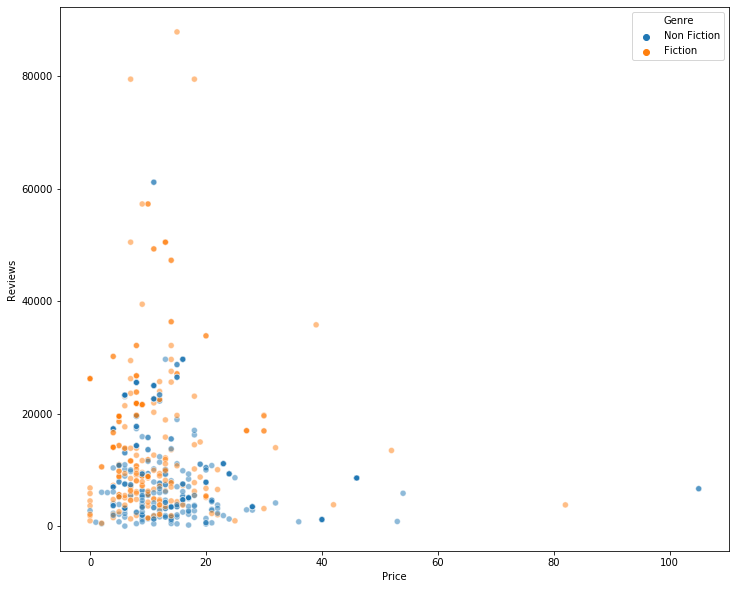

In [29]:
plt.figure(figsize = (12,10))
sns.scatterplot(data = df, x = "Price", y = "Reviews", alpha = 0.5, hue = "Genre")
plt.show()

From the plot, there's no clear relationship between price and review. However, we can see the majority of books in the top 50 are in the lower left corner, which means they mostly have fewer than 40000 reviews and cost less than 30 euros

Furthermore, the scatterplot shows the highest price belongs to a non fiction book, while top 3 most reviewed books are fiction.

### Non fiction vs fiction

Number of reviews between non fiction and fiction

In [52]:
df.groupby("Genre").Reviews.sum()

Genre
Fiction        3764110
Non Fiction    2810195
Name: Reviews, dtype: int64

Number of titles in top 50 between non-fiction and fiction per year:

In [11]:
df.groupby(["Year","Genre"]).Name.count() 

Year  Genre      
2009  Fiction        24
      Non Fiction    26
2010  Fiction        20
      Non Fiction    30
2011  Fiction        21
      Non Fiction    29
2012  Fiction        21
      Non Fiction    29
2013  Fiction        24
      Non Fiction    26
2014  Fiction        29
      Non Fiction    21
2015  Fiction        17
      Non Fiction    33
2016  Fiction        19
      Non Fiction    31
2017  Fiction        24
      Non Fiction    26
2018  Fiction        21
      Non Fiction    29
2019  Fiction        20
      Non Fiction    30
Name: Name, dtype: int64

Over the years, more non-fiction books are in the top 50 best-sellers.

Compare average price between non-fiction and fiction:

In [13]:
df.groupby("Genre").Price.mean() #Non fiction on average have higher price than fiction

Genre
Fiction        10.850000
Non Fiction    14.841935
Name: Price, dtype: float64

Most expensive non-fiction and fiction book:

In [60]:
a = df.groupby("Genre").Price.idxmax()
df.loc[a]

,Name,Author,User Rating,Reviews,Price,Year,Genre
473,The Twilight Saga Collection,Stephenie Meyer,4.7,3801,82,2009,Fiction
69,Diagnostic and Statistical Manual of Mental Di...,American Psychiatric Association,4.5,6679,105,2013,Non Fiction


Most expensive non-fiction and fiction book per year

In [65]:
b = df.groupby(["Genre","Year"]).Price.idxmax()
df.loc[b].set_index(["Year"])

,Name,Author,User Rating,Reviews,Price,Genre
Year,,,,,,
2009,The Twilight Saga Collection,Stephenie Meyer,4.7,3801,82,Fiction
2010,"Towers of Midnight (Wheel of Time, Book Thirteen)",Robert Jordan,4.8,2282,21,Fiction
2011,The Hunger Games Trilogy Boxed Set (1),Suzanne Collins,4.8,16949,30,Fiction
2012,Fifty Shades Trilogy (Fifty Shades of Grey / F...,E L James,4.5,13964,32,Fiction
2013,The Goldfinch: A Novel (Pulitzer Prize for Fic...,Donna Tartt,3.9,33844,20,Fiction
2014,The Alchemist,Paulo Coelho,4.7,35799,39,Fiction
2015,Go Set a Watchman: A Novel,Harper Lee,3.6,14982,19,Fiction
2016,Harry Potter Paperback Box Set (Books 1-7),J. K. Rowling,4.8,13471,52,Fiction
2017,Harry Potter and the Prisoner of Azkaban: The ...,J.K. Rowling,4.9,3146,30,Fiction


Highest rated fiction book per year with more than 8000 votes

In [69]:
df_fiction = df[(df.Genre == "Fiction") & (df.Reviews >= 8000)]
b = df_fiction.groupby("Year")["User Rating"].idxmax()
df_fiction.loc[b]

,Name,Author,User Rating,Reviews,Price,Year,Genre
402,The Help,Kathryn Stockett,4.8,13871,6,2009,Fiction
403,The Help,Kathryn Stockett,4.8,13871,6,2010,Fiction
133,Go the F**k to Sleep,Adam Mansbach,4.8,9568,9,2011,Fiction
245,"Oh, the Places You'll Go!",Dr. Seuss,4.9,21834,8,2012,Fiction
246,"Oh, the Places You'll Go!",Dr. Seuss,4.9,21834,8,2013,Fiction
247,"Oh, the Places You'll Go!",Dr. Seuss,4.9,21834,8,2014,Fiction
248,"Oh, the Places You'll Go!",Dr. Seuss,4.9,21834,8,2015,Fiction
153,Harry Potter and the Chamber of Secrets: The I...,J.K. Rowling,4.9,19622,30,2016,Fiction
40,"Brown Bear, Brown Bear, What Do You See?",Bill Martin Jr.,4.9,14344,5,2017,Fiction
207,Last Week Tonight with John Oliver Presents A ...,Jill Twiss,4.9,11881,13,2018,Fiction


Highest rated non-fiction book per year with more than 8000 votes

In [70]:
df_nonfiction = df[(df.Genre == "Non Fiction") & (df.Reviews >= 8000)]
b = df_nonfiction.groupby("Year")["User Rating"].idxmax()
df_nonfiction.loc[b]

,Name,Author,User Rating,Reviews,Price,Year,Genre
260,Outliers: The Story of Success,Malcolm Gladwell,4.6,10426,20,2009,Non Fiction
515,"Unbroken: A World War II Story of Survival, Re...",Laura Hillenbrand,4.8,29673,16,2010,Non Fiction
187,Jesus Calling: Enjoying Peace in His Presence ...,Sarah Young,4.9,19576,8,2011,Non Fiction
188,Jesus Calling: Enjoying Peace in His Presence ...,Sarah Young,4.9,19576,8,2012,Non Fiction
189,Jesus Calling: Enjoying Peace in His Presence ...,Sarah Young,4.9,19576,8,2013,Non Fiction
190,Jesus Calling: Enjoying Peace in His Presence ...,Sarah Young,4.9,19576,8,2014,Non Fiction
191,Jesus Calling: Enjoying Peace in His Presence ...,Sarah Young,4.9,19576,8,2015,Non Fiction
192,Jesus Calling: Enjoying Peace in His Presence ...,Sarah Young,4.9,19576,8,2016,Non Fiction
327,The 5 Love Languages: The Secret to Love that ...,Gary Chapman,4.8,25554,8,2017,Non Fiction
32,Becoming,Michelle Obama,4.8,61133,11,2018,Non Fiction


### Book by author analysis 

Top 5 authors with most books on the top 50 list between 2009 and 2019

In [75]:
df.groupby("Author").Name.count().sort_values(ascending = False).head(5)

Author
Jeff Kinney                           12
Rick Riordan                          11
Gary Chapman                          11
Suzanne Collins                       11
American Psychological Association    10
Name: Name, dtype: int64

As I don't know who Jeff Kinney is, I'd like to look at his record a bit closer.



Top rated book titles by the author Jeff Kinney

In [78]:
df[df.Author == "Jeff Kinney"].sort_values(by = "User Rating", ascending = False)[:1]

,Name,Author,User Rating,Reviews,Price,Year,Genre
545,Wrecking Ball (Diary of a Wimpy Kid Book 14),Jeff Kinney,4.9,9413,8,2019,Fiction


Average rating of books by Jeff Kinney

In [80]:
df[df.Author == "Jeff Kinney"]["User Rating"].mean()

4.8

I also want to know about author Rick Riordan.

Top rated book by Rick Riordan

In [79]:
df[df.Author == "Rick Riordan"].sort_values(by = "User Rating", ascending = False)[:1]

,Name,Author,User Rating,Reviews,Price,Year,Genre
264,Percy Jackson and the Olympians Paperback Boxe...,Rick Riordan,4.8,548,2,2010,Fiction


Average rating of books by Rick

In [81]:
df[df.Author == "Rick Riordan"]["User Rating"].mean()

4.7727272727272725

Authors with most reviews:

In [83]:
df.groupby("Author").Reviews.sum().sort_values(ascending = False).head(5) #Those authors with big fan base

Author
Suzanne Collins    278329
John Green         210419
E L James          178011
Dr. Seuss          176545
Gillian Flynn      171813
Name: Reviews, dtype: int64

## Takeaway and proposed next steps

This is a simple, straightforward project for beginners who want to apply new EDA knowledge into practice.

From the analysis, my insights are:
1. Most of best selling books are non-fiction
2. Fiction books have more reviews (= larger fan base) than non-fiction
3. Non-fiction books are on average more expensive than fiction books, as some of them are academic books.

However, there are some variables which can add more values to the analysis:
1. Number of votes: to justify the rating
2. Book genre: so further sub-genre such as thriller, romance, action and so on. This variable can help us to understand which book genres are most likely to become best sellers, as well as trend in reading taste over the years.